In [1]:
import pandas as pd
import numpy as np

## Collecting Data

In [2]:
df=pd.read_csv('news.csv')
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

## Analyzing Data

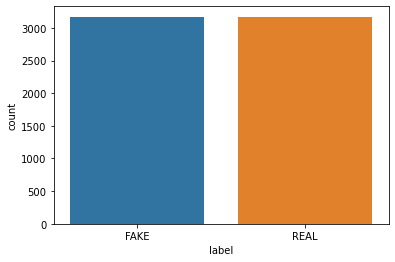

In [3]:
import seaborn as sns
sns.countplot(x='label',data=df)

In [4]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

## Cleaning Data

In [5]:
df.isnull()
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Train Data


In [6]:
x=df['text']
y=df.label
x.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [7]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(stop_words='english')
t_train=tf.fit_transform(x_train) 
t_test=tf.transform(x_test)

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

p=PassiveAggressiveClassifier()
p.fit(t_train,y_train)
ypredict=p.predict(t_test)

In [11]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,ypredict)
print('Accuracy score is %f'%Accuracy)
print('Accuracy is %.2f'%(Accuracy*100),'%')

Accuracy score is 0.936875
Accuracy is 93.69 %


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Confusion matrix is')
confusionmat=confusion_matrix(y_test,ypredict,labels=['FAKE','REAL'])
print(confusionmat)

Confusion matrix is
[[921  66]
 [ 54 860]]
